In [12]:
import pandas as pd
import glob

In [13]:
path = r'C:\Users\koala\Documents\МГУ\6 семестр\Untitled Folder\datasets'
all_files = glob.glob(path + "/*.csv")

season_data = []

for filename in all_files:
    season = pd.read_csv(filename)
    season_data.append(season)

In [22]:
# Найдите уникальных игроков, присутствующих в каждом сезоне
unique_players = set(season_data[0]['id'])

for season in season_data[1:]:
    unique_players.intersection_update(set(season['id']))

# Создайте новые датасеты с игроками, которые присутствуют в каждом сезоне
filtered_season_data = []

for season in season_data:
    filtered_season = season[season['id'].isin(unique_players)]

    # Удалите дубликаты игроков, которые перешли в другую команду в середине сезона
    filtered_season = filtered_season.sort_values(by='MP', ascending=False).drop_duplicates(subset='id', keep='first')

    filtered_season_data.append(filtered_season)

# Сохраните отфильтрованные датасеты в новые CSV-файлы
for i, filtered_season in enumerate(filtered_season_data):
    filtered_season.to_csv(f'filtered_season_{i+1}.csv', index=False)

In [36]:
import os

# Отсортируйте игроков по имени
for i in range(len(filtered_season_data)):
    filtered_season_data[i] = filtered_season_data[i].sort_values(by='Player')

# Список характеристик для каждой группы
group_1 = ["Gls", "SoT%", "Cmp", "Cmp%", "Ast", "Tkl", "Tkl%", "Clr", "Att.5", "Succ%", "Min", "PPM", "CrdY", "CrdR", "Fls", "Won%"]
group_2 = ["xG", "xA", "Blocks", "Tkl+Int", "Err", "Def Pen", "Att Pen", "Att.5", "Succ%", "TotDist.1", "Mn/Sub", "onxG", "xG+/-90", "OG", "Recov", "Won%"]
group_3 = ["Sh/90", "np:G-xG", "Dist", "xG", "npxG/Sh", "Cmp%", "PrgDist", "A-xAG", "PrgP", "Crs", "SCA90", "PassLive", "TO", "GCA90", "Tkl%", "Blocks", "Tkl+Int", "Err", "Def Pen", "Att Pen", "Succ%", "44986", "PrgR", "Min%", "Compl", "onG", "onGA", "xG+/-90", "CrdY", "CrdR", "Fls", "Recov", "Won%"]

groups = [group_1, group_2, group_3]
group_names = ['red', 'yellow', 'green']

for group_name, group in zip(group_names, groups):
    # Создайте новую папку для каждой группы
    os.makedirs(group_name, exist_ok=True)

    # Извлеките характеристики для каждой группы и сохраните в новых CSV-файлах
    for i, filtered_season in enumerate(filtered_season_data):
        selected_columns = ['Player', 'Pos', 'Squad', 'id', 'Age', 'RATING'] + group
        season_group = filtered_season[selected_columns]
        season_group.to_csv(f"{group_name}/group_{group_name}_season_{i+1}.csv", index=False)

In [37]:
import os
import pandas as pd

# Создаем новые папки для каждой из групп, если их еще нет
folders = ['red', 'yellow', 'green']
for folder in folders:
    if not os.path.exists(folder + '_seasons'):
        os.makedirs(folder + '_seasons')

# Список соответствия сезонов и годов
seasons_years = {'1': '2017', '2': '2018', '3': '2019', '4': '2020', '5': '2021'}

for folder in folders:
    for file in os.listdir(folder):
        # Игнорируем скрытые файлы
        if file.startswith('.'):
            continue
        # Определяем номер сезона по названию файла
        season = file.split('.')[0][-1]
        # Определяем год по номеру сезона
        year = seasons_years[season]
        # Считываем файл и добавляем столбец с номером сезона
        df = pd.read_csv(os.path.join(folder, file))
        df['Season'] = year
        # Разделяем позиции игроков на группы
        df['Pos'] = df['Pos'].replace({'DF': 'defender', 'MF': 'midfielder', 'FW': 'forward',
                                       'FB': 'defender', 'LB': 'defender', 'RB': 'defender',
                                       'CB': 'defender', 'DM': 'midfielder', 'CM': 'midfielder',
                                       'LM': 'midfielder', 'RM': 'midfielder', 'WM': 'midfielder',
                                       'LW': 'forward', 'RW': 'forward', 'AM': 'midfielder', 'DFFW': 'midfielder', 'DFMF': 'forward', 'FWDF': 'forward', 'FWMF': 'forward', 'MFFW': 'midfielder', 'MFDF': 'forward'})
        # Сохраняем файл в новую папку с добавленным столбцом Season и разделенными позициями
        df.to_csv(os.path.join(folder + '_seasons', file), index=False)

# Объединим файлы в один

In [38]:
import pandas as pd
import os

# определяем директорию, где хранятся файлы
dir_path = 'C:/Users/koala/Documents/МГУ/6 семестр/Untitled Folder/yellow_seasons/'

# получаем список файлов для объединения
file_names = ['group_yellow_season_1.csv', 'group_yellow_season_2.csv', 'group_yellow_season_3.csv', 'group_yellow_season_4.csv', 'group_yellow_season_5.csv']

# создаем пустой список для хранения данных из файлов
dfs = []

# читаем данные из каждого файла и добавляем их в список
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    df = pd.read_csv(file_path)
    dfs.append(df)

# объединяем данные из всех файлов в один датафрейм
merged_df = pd.concat(dfs, ignore_index=True)

# сохраняем объединенный датафрейм в новый файл
merged_df.to_csv('yellow_group_all_seasons.csv', index=False)

In [39]:
# определяем директорию, где хранятся файлы
dir_path = 'C:/Users/koala/Documents/МГУ/6 семестр/Untitled Folder/green_seasons/'

# получаем список файлов для объединения
file_names = ['group_green_season_1.csv', 'group_green_season_2.csv', 'group_green_season_3.csv', 'group_green_season_4.csv', 'group_green_season_5.csv']

# создаем пустой список для хранения данных из файлов
dfs = []

# читаем данные из каждого файла и добавляем их в список
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    df = pd.read_csv(file_path)
    dfs.append(df)

# объединяем данные из всех файлов в один датафрейм
merged_df = pd.concat(dfs, ignore_index=True)

# сохраняем объединенный датафрейм в новый файл
merged_df.to_csv('green_group_all_seasons.csv', index=False)

In [40]:
# определяем директорию, где хранятся файлы
dir_path = 'C:/Users/koala/Documents/МГУ/6 семестр/Untitled Folder/red_seasons/'

# получаем список файлов для объединения
file_names = ['group_red_season_1.csv', 'group_red_season_2.csv', 'group_red_season_3.csv', 'group_red_season_4.csv', 'group_red_season_5.csv']

# создаем пустой список для хранения данных из файлов
dfs = []

# читаем данные из каждого файла и добавляем их в список
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    df = pd.read_csv(file_path)
    dfs.append(df)

# объединяем данные из всех файлов в один датафрейм
merged_df = pd.concat(dfs, ignore_index=True)

# сохраняем объединенный датафрейм в новый файл
merged_df.to_csv('red_group_all_seasons.csv', index=False)

In [41]:
# Функция для выбора наиболее коррелированной переменной с Rating из пары с корреляцией больше 0.6
def select_most_correlated_with_rating(correlation_matrix, var1, var2, target='RATING'):
    if abs(correlation_matrix.loc[var1, target]) > abs(correlation_matrix.loc[var2, target]):
        return var1
    else:
        return var2

# Функция для получения датасета с обновленными переменными
def get_updated_dataset(group_name):
    group_df = pd.read_csv("new/" + group_name + "/" + group_name + "_group_all_seasons_dummy.csv")
    correlation_matrix = group_df.corr()
    columns_to_drop = set()

    var = ['RATING', 'Age', 'Age^2', 'def', 'mid', 'forw']
    for var1 in correlation_matrix.columns:
        for var2 in correlation_matrix.columns:
            if (var1 != var2
                    and var1 not in var
                    and var2 not in var
                    and abs(correlation_matrix.loc[var1, var2]) > 0.6

            ):
                columns_to_drop.add(select_most_correlated_with_rating(correlation_matrix, var1, var2))

    return group_df.drop(columns_to_drop, axis=1)

# Сохраните новые датасеты с обновленными переменными
for group_name in group_names:
    updated_group_df = get_updated_dataset(group_name)
    updated_group_df.to_csv("new/" + group_name + "/" + group_name + "_group_all_seasons_dummy_updated.csv", index=False)


Group red Variables:
Index(['Player', 'Pos', 'Squad', 'id', 'Age', 'Season', 'RATING', 'Gls',
       'SoT%', 'Cmp%', 'Ast', 'Tkl%', 'Clr', 'Att.5', 'Succ%', 'PPM', 'CrdY',
       'CrdR', 'Won%', 'def', 'mid', 'forw', 'Age^2'],
      dtype='object')

Group yellow Variables:
Index(['Player', 'Pos', 'Squad', 'id', 'Age', 'Season', 'RATING', 'xG',
       'Blocks', 'Tkl+Int', 'Err', 'Def Pen', 'Att.5', 'Succ%', 'Mn/Sub',
       'xG+/-90', 'OG', 'Won%', 'def', 'mid', 'forw', 'Age^2'],
      dtype='object')

Group green Variables:
Index(['Player', 'Pos', 'Squad', 'id', 'Age', 'Season', 'RATING', 'Sh/90',
       'np:G-xG', 'Dist', 'npxG/Sh', 'Cmp%', 'A-xAG', 'Crs', 'TO', 'Tkl%',
       'Tkl+Int', 'Err', 'Def Pen', 'Succ%', '44986', 'onGA', 'xG+/-90',
       'CrdY', 'CrdR', 'Won%', 'def', 'mid', 'forw', 'Age^2'],
      dtype='object')

Group red Descriptive Statistics:
            Age    Season    RATING       Gls      SoT%      Cmp%       Ast  \
count  3080.000  3080.000  3080.000  3080.000  3

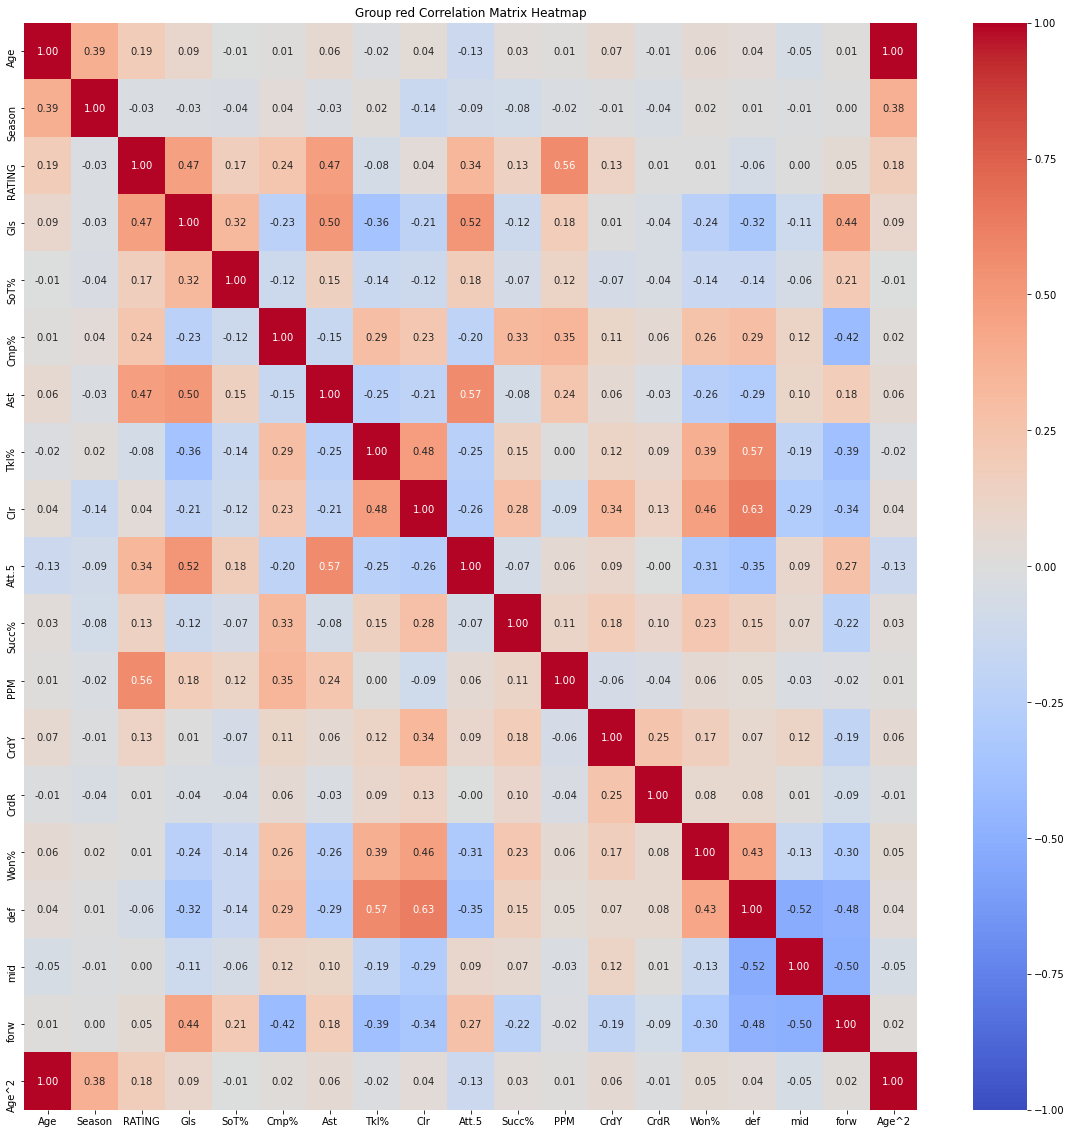

Group yellow Descriptive Statistics:
            Age    Season    RATING        xG    Blocks   Tkl+Int       Err  \
count  3080.000  3080.000  3080.000  3080.000  3080.000  3080.000  3080.000   
mean     25.800  2019.000    78.132     3.156    18.471    52.733     0.547   
std       3.668     1.414     4.654     4.079    13.796    35.954     0.891   
min      16.000  2017.000    62.000     0.000     0.000     0.000     0.000   
25%      23.000  2018.000    75.000     0.700     8.000    24.000     0.000   
50%      26.000  2019.000    78.000     1.700    16.000    46.000     0.000   
75%      28.000  2020.000    81.000     3.900    26.000    76.000     1.000   
max      40.000  2021.000    94.000    33.200    90.000   225.000     7.000   

        Def Pen     Att.5     Succ%    Mn/Sub   xG+/-90        OG      Won%  \
count  3080.000  3080.000  3080.000  3080.000  3080.000  3080.000  3080.000   
mean     60.152    33.185    60.010    16.730     0.206     0.069    46.998   
std      68.07

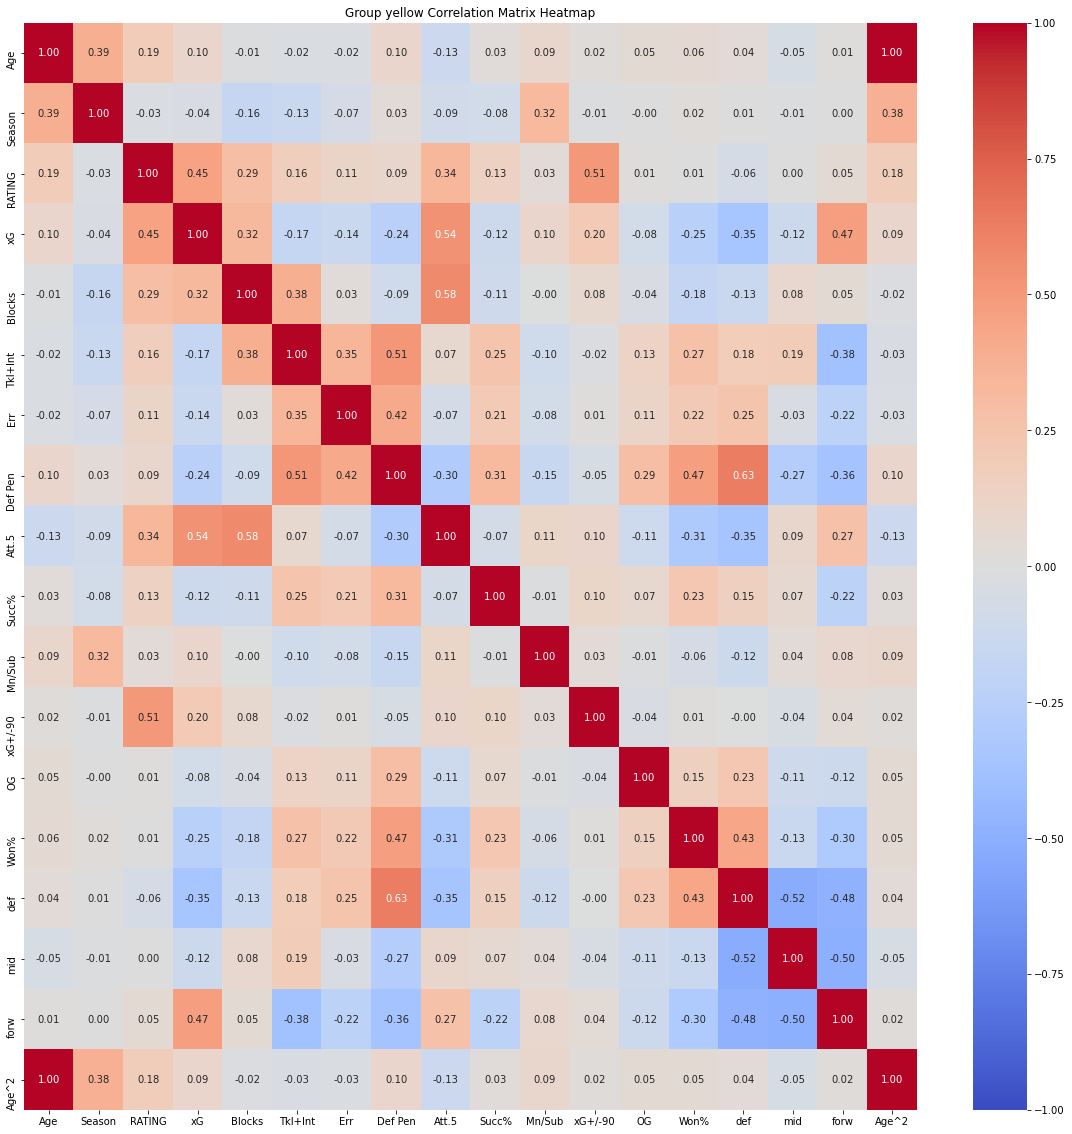

Group green Descriptive Statistics:
            Age    Season    RATING     Sh/90   np:G-xG      Dist   npxG/Sh  \
count  3080.000  3080.000  3080.000  3080.000  3080.000  3080.000  3080.000   
mean     25.800  2019.000    78.132     1.394     0.098    17.563     0.094   
std       3.668     1.414     4.654     1.099     1.618     5.756     0.055   
min      16.000  2017.000    62.000     0.000    -8.500     0.000     0.000   
25%      23.000  2018.000    75.000     0.540    -0.700    13.700     0.060   
50%      26.000  2019.000    78.000     1.090    -0.100    17.700     0.080   
75%      28.000  2020.000    81.000     2.090     0.700    21.500     0.120   
max      40.000  2021.000    94.000    15.000    12.100    47.900     0.970   

           Cmp%     A-xAG       Crs  ...     44986      onGA   xG+/-90  \
count  3080.000  3080.000  3080.000  ...  3080.000  3080.000  3080.000   
mean     78.361     0.071    37.917  ...    42.418    25.309     0.206   
std       8.427     1.362    5

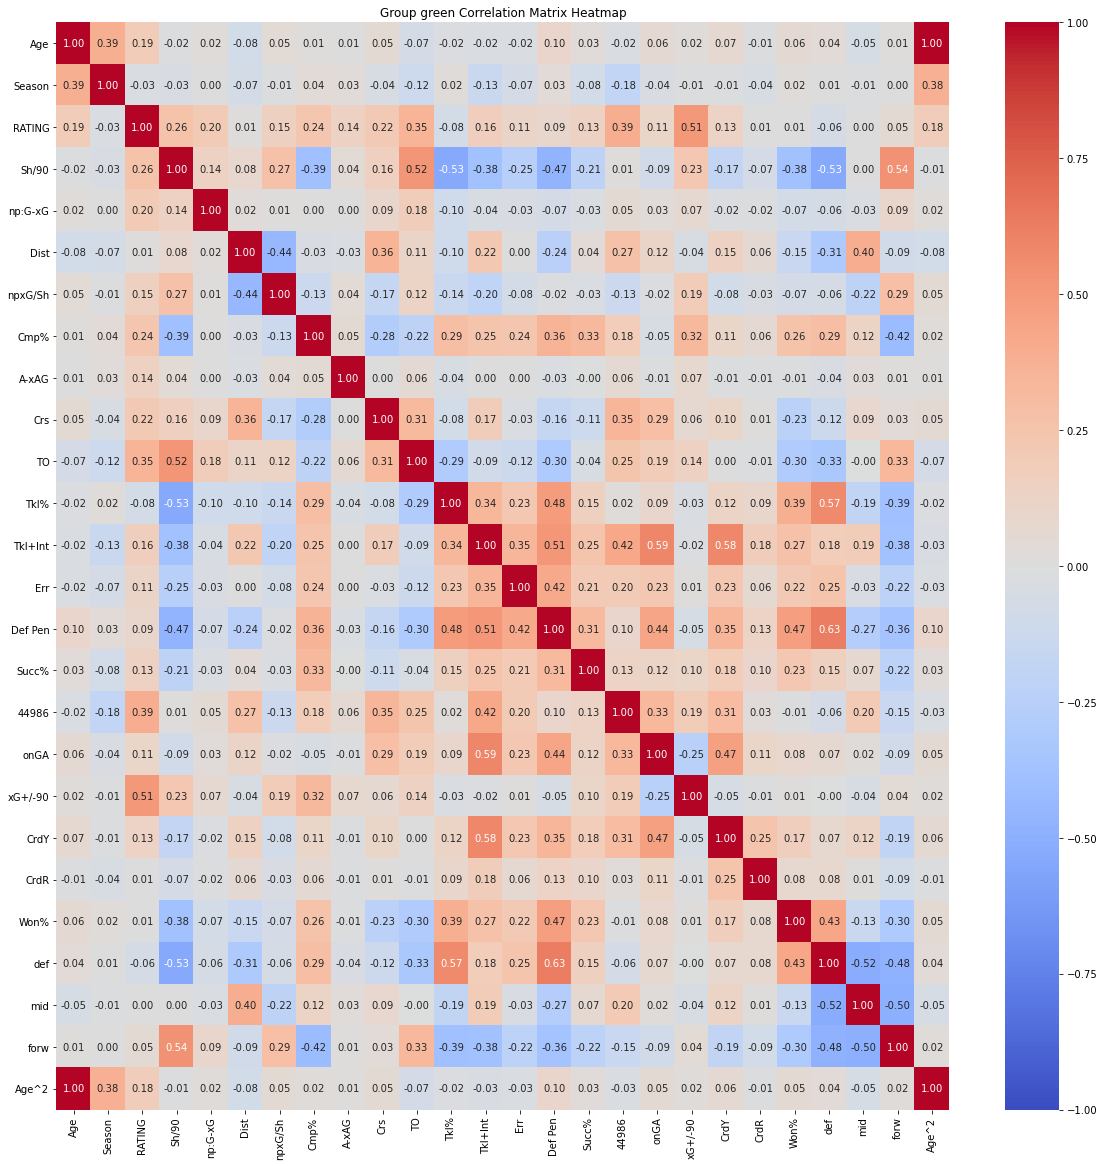

In [43]:
# Загрузите обновленные датасеты
updated_group_data = {}
for group_name in group_names:
    updated_group_data[group_name] = pd.read_csv("new/" + group_name + "/" + group_name + "_group_all_seasons_dummy_updated.csv")

# Выведите названия переменных для каждой группы
for group_name in group_names:
    print(f"Group {group_name} Variables:")
    print(updated_group_data[group_name].columns)
    print()

# Функция для создания описательных статистик, корреляционных матриц и графиков
def analyze_updated_group(group_name, group_df):
    print(f"Group {group_name} Descriptive Statistics:")
    print(group_df.describe().round(3))

    correlation_matrix = group_df.corr()
    print(f"\nGroup {group_name} Correlation Matrix:")
    print(correlation_matrix.round(2))

    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Group {group_name} Correlation Matrix Heatmap")
    plt.show()

# Проанализируйте каждую обновленную группу
for group_name in group_names:
    analyze_updated_group(group_name, updated_group_data[group_name])

In [59]:
!pip install --upgrade statsmodels

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'C:\\Users\\koala\\anaconda3\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


In [68]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Загрузка данных
df = pd.read_csv(r'C:\Users\koala\Documents\МГУ\6 семестр\Untitled Folder\green_updated\updated_dataset.csv')

# Выбор регрессоров и отклика
X = df[['Sh/90', 'np:G-xG', 'Dist',
       'npxG/Sh', 'Cmp%', 'A-xAG', 'Crs', 'TO', 'Tkl%', 'Tkl+Int', 'Err',
       'Def Pen', 'Succ%', '44986', 'onGA', 'xG+/-90', 'CrdY', 'CrdR', 'Won%']]
y = df['RATING']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Построение LASSO регрессии
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Вывод результатов
print('Intercept:', lasso.intercept_)
print(pd.Series(lasso.coef_, index=X.columns))
print('R-squared:', lasso.score(X_scaled, y))


Intercept: 78.13181818181818
Sh/90      0.773168
np:G-xG    0.449090
Dist      -0.069191
npxG/Sh    0.314656
Cmp%       0.744422
A-xAG      0.262616
Crs        0.493141
TO         0.845136
Tkl%      -0.082744
Tkl+Int    0.207452
Err        0.101628
Def Pen    0.596966
Succ%      0.038733
44986      0.762128
onGA      -0.000000
xG+/-90    1.457257
CrdY       0.015394
CrdR      -0.000000
Won%       0.101384
dtype: float64
R-squared: 0.48632670246494414


In [1]:
!pip install linearmodels